## Laboratoire 1 - Analyse et préparation des données et extraction de primitives
### GTI771 - Apprentissage machine avancé
#### Département du génie logiciel et des technologies de l’information

#### Version 1.0 janvier 2020
#### <font color=blue> Version 2.0 janvier 2020 </font>
#### <font color=magenta> Version 3.0 février 2020 </font>

##### Prof. Alessandro L. Koerich

| Étudiants             | NOMS - CODE PERMANENT                                   |
|-----------------------|---------------------------------------------------------|
| Session               | HIV 2020                                            |
| Équipe                | 10                                                       |
| Numéro du laboratoire | 1                                                       |
| Professeur            | Prof. Alessandro L.Koerich                                               |
| Chargé de laboratoire | Alessandro L.Koerich                                                     |
| Date                  | 8 FEV 2020                                                    |

## Introduction

Ce premier laboratoire porte sur la définition et l’extraction de primitives sur des visages. Le problème de classification qui vous est présenté est le problème [Facial Expression Recognition (FER)](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data), dont le but est de classer des visages dans sept catégories. En vous basant sur les concepts vus en classe, vous devez définir des primitives que vous jugez pertinentes à extraire sur ces types d’images et effectuer l’extraction de celles-ci sur l’ensemble de données fournies avec cet énoncé.

Veuillez noter que les images qui vous sont fournies ne sont pas nécessairement très faciles à travailler. Plusieurs images comportent du bruit, des artéfacts ou des éléments non pertinents. Le défi de ce laboratoire repose sur cette difficulté qui est chose courante dans des problèmes d’apprentissage machine moderne.

Voici, en exemple, des images de visages se retrouvant dans l’ensemble de données:

![Exemples de FER](https://miro.medium.com/max/2420/1*nXqJ4lMiBRp4Ilm3bpRxuA.png)


L’évaluation de ce laboratoire sera basée sur la qualité des primitives proposées, les réponses aux questions dans cette notebook ainsi que l'organisation de votre code source <font color=blue> (SVP, n'oubliez pas des commentaires dans le code!)</font>. Le pouvoir discriminant, c’est-à-dire la capacité des primitives à bien séparer les exemples des classes dans l’espace des primitives, sera également évalué.

## Partie 1: Imports

#### (1a) Import de bibliotèques

##### À faire:
1. Ajouter toutes les bibliothèques que vous avez utilisées pour compléter ce notebook dans une cellule avec une petite description.

In [0]:
import numpy as np  # package for scientific computing with Python.
import matplotlib.pyplot as plt # 2D plotting library
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from joblib import dump, load
from sklearn.preprocessing import MinMaxScaler
import pylab

## Partie 2: Analyse exploratoire des données

On va commencer en regardant les données.

Pour ce lab, nous allons utiliser le dataset FER.

Le dataset est disponible dans https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data, et il continent presque 35,000 visages.

### (2a) Charger le fichier de données

In [0]:
import numpy
from sklearn.preprocessing import MinMaxScaler
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
ferData = numpy.loadtxt('fer2013.csv', delimiter=',', dtype=numpy.str)
Xtrain = numpy.ones((28709,2304),numpy.uint8)
for i in range(1, 28710):
	Xtrain[i-1]=ferData[i,1].split(" ")

ytrain=ferData[1:28710,0].astype(numpy.int)
Xval = numpy.ones((3589,2304),float)
for i in range(28710, 32299):
	Xval[i-28710]=ferData[i,1].split(" ")

yval=ferData[28710:32299,0].astype(numpy.int)
Xtest = numpy.ones((3589,2304),float)
for i in range(32299, 35888):
	Xtest[i-32299]=ferData[i,1].split(" ")

ytest=ferData[32299:,0].astype(numpy.int)


# normalize
scaler = MinMaxScaler(feature_range=(0, 255))
Xtrain = scaler.fit_transform(Xtrain)
Xval = scaler.fit_transform(Xval)
Xtest = scaler.fit_transform(Xtest)



In [0]:
# reshape to be [samples][channels][width][height]
Xtrain = Xtrain.reshape( Xtrain.shape[0], 1, 48, 48 ).astype('uint8')
Xtest  = Xtest.reshape( Xtest.shape[0], 1, 48, 48 ).astype('uint8')
Xval   = Xval.reshape( Xval.shape[0], 1, 48, 48 ).astype('uint8')


print( Xtrain.shape, Xval.shape, Xtest.shape )

(28709, 1, 48, 48) (3589, 1, 48, 48) (3589, 1, 48, 48)


### <font color=blue> (2b) Visualisation des visages </font>

Pensez-vous qui c'est necessaire un pre-traitement des images? Si oui, 
[Pre-processing](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)

### (2b) Statistiques des données

##### À faire:
1. Calculer quelques statistiques (moyenne, écart-type, etc.) que vous jugez importantes sur les données (entrées et sorties)
2. Faire une analyse des résultats et présenter vos conclusions sur ces statistiques.

### Partie 2b: Code:

Les Effectifs pour chaque sentiment['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'] respectivement[3995, 436, 4097, 7215, 4830, 3171, 4965]
Les fréquences pour chaque sentiment['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'] respectivement[13.91549688251071, 1.5186875195931588, 14.270786164617368, 25.13149186666202, 16.823992476226966, 11.045316799609878, 17.294228290779895]


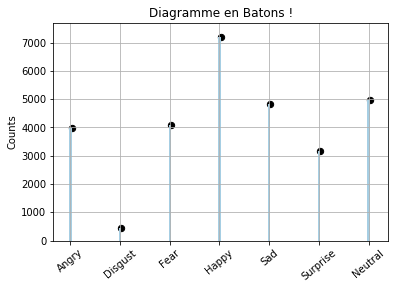

Les moyennes pour chaque sentiment['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'] respectivement [126.23, 135.23, 135.52, 129.43, 121.27, 146.26, 123.9]
Les mediannes pour chaque sentiment['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'] respectivement [130.0, 141.0, 142.0, 134.0, 124.0, 157.0, 126.0]
Les ecart types pour chaque sentiment['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'] respectivement [65.17, 63.39, 64.98, 63.36, 64.85, 64.91, 65.28]
Quartile Q1 pour chaque sentiment['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'] respectivement vaut :  [75.0, 88.0, 86.0, 81.0, 69.0, 99.0, 71.0]
Quartile Q3pour chaque sentiment['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'] respectivement vaut :  [177.0, 186.0, 187.0, 179.0, 173.0, 198.0, 176.0]
L ecart interquartile pour chaque sentiment['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'] respectivementvaut :  [102.0, 98.0, 10

In [0]:
#Analyse des données par classe: On choisit dans ce cas d'annalyer les données Xtrain(plus grand nombre de données )

list_Angry=[]
list_Disgust=[]
list_Fear=[]
list_Happy=[]
list_Sad=[]
list_Surprise=[]
list_Neutral=[]
for i in range (ytrain.size):
  if ytrain[i]==0:
    list_Angry.append(i)
  if ytrain[i]==1:
    list_Disgust.append(i)
  if  ytrain[i]==2:
    list_Fear.append(i)
  if ytrain[i]==3:
    list_Happy.append(i)
  if ytrain[i]==4:
    list_Sad.append(i)
  if ytrain[i]==5:
    list_Surprise.append(i)
  if ytrain[i]==6:
    list_Neutral.append(i)   

#(a=Angry, d=Disgust, f=Fear, h=Happy, sa=Sad, sur=Surprise, n=Neutral).

a=np.array([Xtrain[i]for i in list_Angry])
d=np.array([Xtrain[i] for i in list_Disgust])
f=np.array([Xtrain[i]for i in list_Fear])
h=np.array([Xtrain[i]for i in list_Happy])
sa=np.array([Xtrain[i]for i in list_Sad])
sur=np.array([Xtrain[i]for i in list_Surprise])
n=np.array([Xtrain[i]for i in list_Neutral])

#Clacul des effectifs et des fréquences de chaque classe
data_num=28709
Effectifs=[len(a),len(d),len(f),len(h),len(sa),len(sur),len(n)]
Frequences=[100*len(a)/data_num,100*len(d)/data_num,100*len(f)/data_num,100*len(h)/data_num,100*len(sa)/data_num,100*len(sur)/data_num,100*len(n)/data_num]

print("Les Effectifs pour chaque sentiment['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'] respectivement"+str(Effectifs))
print("Les fréquences pour chaque sentiment['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'] respectivement"+str(Frequences))


#Calcul des moyennes/médiannes/écart-types:
Moy_class=[np.mean(a),np.mean(d),np.mean(f),np.mean(h),np.mean(sa),np.mean(sur),np.mean(n)] # La moyenne
Med_class=[np.median(a),np.median(d),np.median(f),np.median(h),np.median(sa),np.median(sur),np.median(n)] # la médianne 
Ecart_class=[np.std(a),np.std(d),np.std(f),np.std(h),np.std(sa),np.std(sur),np.std(n)] #L'ecart type
print("Les moyennes pour chaque sentiment['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'] respectivement "+str([round(elt,2) for elt in Moy_class]))
print("Les mediannes pour chaque sentiment['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'] respectivement "+str([round(elt,2) for elt in Med_class ]))
print("Les ecart types pour chaque sentiment['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'] respectivement "+str([round(elt,2) for elt in Ecart_class ]))


# On calcule le quantile 0,25 qui est le quartile Q1
Q1 = [round(np.percentile(a, 25)),round(np.percentile(d, 25)),round(np.percentile(f, 25)),round(np.percentile(h, 25)),round(np.percentile(sa, 25)),round(np.percentile(sur, 25)),round(np.percentile(n, 25))]
print("Quartile Q1 pour chaque sentiment['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'] respectivement vaut : ", Q1)
 
# On calcule le quantile 0,75 qui est le quartile Q3
Q3 = [round(np.percentile(a, 75)),round(np.percentile(d,75)),round(np.percentile(f,75)),round(np.percentile(h,75)),round(np.percentile(sa,75)),round(np.percentile(sur,75)),round(np.percentile(n,75))]

print("Quartile Q3pour chaque sentiment['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'] respectivement vaut : ",Q3)
 
# L ecart interquartile est Q3 - Q1
Q31=[]
for i in range(7):
  Q31.append(Q3[i]-Q1[i])
print("L ecart interquartile pour chaque sentiment['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'] respectivementvaut : ", Q31) #Mesure la dispersion robuste non influencée par les valeurs extremes+ rEPRESENTE L4ETENDUE DE LA MOITI2 CENTRALE DES DONN2ES 


D'après le diagramme à batons et le calcul des fréquences et d'effectifs Le "Mode" ou "la classe modale" de cette distribution multimodale (Xtrain) est **Happy** (25.13%), autrement dit les images correspondantes aux visages heureux sont les plus nombreux. Alors que les visages classifiés comme **Disgust** (1.51%) sont  les moins nombreux.
L' écart type est augmenté pour chaque classe(entre 63-65) ce qui explique à quel point les données d'apprentissage par classe sont dispersées les unes par rapport aux autres(dispersion importante pour toutes les classes).


```

### Partie 2b: Code:"Paramètres statistiques"

In [0]:
# Code exemple:
# Histogramme des étiquettes
hist, _ = np.histogram(ytrain, density=False, bins=7, range=(0, 7))

### Partie 2b: Résultats et résponses:

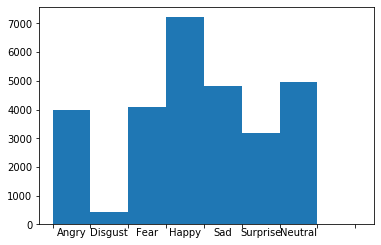

In [0]:
# Code exemple
# Plot du histogramme
# import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(ytrain, bins = [0,1,2,3,4,5,6,7]) 

ax.set_xticklabels([])
#(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
mticks = ax.get_xticks()
ax.set_xticks((mticks[:-1]+mticks[1:])/2+1, minor=True)
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xticklabels(labels, minor=True)
plt.show()


#Tracer le diagramme à batons 
Effectifs=[len(a),len(d),len(f),len(h),len(sa),len(sur),len(n)]
fig = plt.figure()
x = [1,2,3,4,5,6,7]
width = 0.05
plt.bar(x, Effectifs, width, color=(0.65098041296005249, 0.80784314870834351, 0.89019608497619629, 1.0)  )
plt.scatter([i+width/2.0 for i in x],Effectifs,color='k',s=40)
plt.grid()
plt.ylabel('Counts')
plt.title('Diagramme en Batons !')
pylab.xticks(x,['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'],rotation=40)
plt.show()



### (2c) Créer et évaluer un modèle de base (baseline)

Un modèle très simple, mais naturel est une ou nous calculons un modèle moyen (template) pour chaque classe (sur les données d'apprentissage) et nous utilisons ces modèles (templates) pour faire des prédictions sur des nouvelles données.

##### À faire:
1. Créer un template pour chaque classe
2. Faire un plot de chaque template <font color=blue> (visage moyen) </font>
3. Classifier tous les exemples (ensembles d'apprentissage, validation et test) et reporter les résultats:<br>
 3a. taux de classification correct sur les trois (3) ensembles de données<br>
 3b. matrice de confusion pour les résultas sur l'ensemble de test
4. Faire une analyse des résultats et présenter vos conclusions sur ce modèle

### Partie 2c: Code:

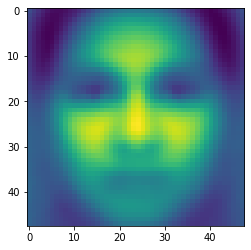

In [0]:
# Votre code ici
#Template_matching: Création d'un template
list_Angry=[]
list_Disgust=[]
list_Fear=[]
list_Happy=[]
list_Sad=[]
list_Surprise=[]
list_Neutral=[]
for i in range (ytrain.size):
  if ytrain[i]==0:
    list_Angry.append(i)
  if ytrain[i]==1:
    list_Disgust.append(i)
  if  ytrain[i]==2:
    list_Fear.append(i)
  if ytrain[i]==3:
    list_Happy.append(i)
  if ytrain[i]==4:
    list_Sad.append(i)
  if ytrain[i]==5:
    list_Surprise.append(i)
  if ytrain[i]==6:
    list_Neutral.append(i)   

#(a=Angry, d=Disgust, f=Fear, h=Happy, sa=Sad, sur=Surprise, n=Neutral).

a=np.array([Xtrain[i]for i in list_Angry])
d=np.array([Xtrain[i] for i in list_Disgust])
f=np.array([Xtrain[i]for i in list_Fear])
h=np.array([Xtrain[i]for i in list_Happy])
sa=np.array([Xtrain[i]for i in list_Sad])
sur=np.array([Xtrain[i]for i in list_Surprise])
n=np.array([Xtrain[i]for i in list_Neutral])

#Liste qui contient un template de chaque classe
templates=np.array((a.mean(0),d.mean(0),f.mean(0),h.mean(0),sa.mean(0),sur.mean(0),n.mean(0)))

#Plot de chaque template(visage moyen)

plt.imshow(np.squeeze(a.mean(0).reshape(1, 48, 48 ),axis=0))   #Template Angry Face
plt.imshow(np.squeeze(d.mean(0).reshape(1, 48, 48 ),axis=0))   #Template Disgust Face
plt.imshow(np.squeeze(f.mean(0).reshape(1, 48, 48 ),axis=0))   #Template Fear Face
plt.imshow(np.squeeze(h.mean(0).reshape(1, 48, 48 ),axis=0))   #Template Happy Face
plt.imshow(np.squeeze(sa.mean(0).reshape(1, 48, 48 ),axis=0))  #Template Sad Face
plt.imshow(np.squeeze(sur.mean(0).reshape(1, 48, 48 ),axis=0)) #Template Surprise Face
plt.imshow(np.squeeze(n.mean(0).reshape(1, 48, 48 ),axis=0))   #Template Neutral Face 



#Classification ensemble apprentissage

a=np.zeros((7,2304))


for i in range(7):
    a[i,:]=templates[i].reshape(1,2304)[0].astype('uint8')


Xtrain = numpy.ones((28709,2304),numpy.uint8)
for i in range(1, 28710):
	Xtrain[i-1]=ferData[i,1].split(" ")
 
Xval = numpy.ones((3589,2304),float)
for i in range(28710, 32299):
	Xval[i-28710]=ferData[i,1].split(" ")


Xtest = numpy.ones((3589,2304),float)
for i in range(32299, 35888):
	Xtest[i-32299]=ferData[i,1].split(" ") 


vec_sortie=[0,1,2,3,4,5,6]
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(a,vec_sortie)

ytrain_pred= knn.predict(Xtrain)
yval_pred=knn.predict(Xval)
ytest_pred=knn.predict(Xtest)

#Taux de classification
def accuracy(X_set, y_set):
  acc = metrics.accuracy_score(X_set, y_set)
  print("accuracy_score: " + '{0:.5f}'.format(acc))
  return acc
    



#(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

### Partie 2c: Résultats et résponses:

In [0]:
# Vos résultats ici:
accTrain=accuracy(ytrain_pred,ytrain)
accVal=accuracy(yval_pred,yval)
accTest=accuracy(ytest_pred,ytest)
print('Taux de classification pour l ensemble apprentissage est '+str(accTrain)+'%')
print('Taux de classification pour l ensemble validation est '+str(accTest)+'%')
print('Taux de classification pour l ensemble test est '+str(accVal)+'%')

accuracy_score: 0.12059
accuracy_score: 0.11284
accuracy_score: 0.11591
Taux de classification pour l ensemble apprentissage est 0.12058936222090634%
Taux de classification pour l ensemble validation est 0.11590972415714684%
Taux de classification pour l ensemble test est 0.11284480356645304%


## Partie 3: Extraction de primitives

Vous devez faire une recherche bibliographique pour trouver quelles sont les primitives qui sont plus souvent utilisées pour la reconnaissance des expressions faciales. Voici quelques sources et mot-clés pour guider votre recherche:

- https://doi.org/j.imavis.2008.08.005
- http://www.inf.ufpr.br/lesoliveira/download/ESWA2013.pdf
- https://doi.org/10.1016/j.patrec.2015.06.007 
- https://doi.org/10.1109/FG.2011.5771374


##### mots-clés: facial expression recognition, facial emotion recognition.


### Bibliotèques Python pour l'extraction de primitives

* [Scikit-image](https://scikit-image.org/docs/dev/)
* [OpenCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)
* [Scikit-learn](https://scikit-learn.org/stable/modules/feature_extraction.html)

### Primitives candidates

* LBP, LPQ, Gabor filters, SIFT, SURF, HOG, GLCM, Haralick Moments, etc.

### (3a) Extraire des primitives

##### À faire:
1. Choisir au moins deux (2) ensembles de primitives et extraire ces primitives des visages (ensembles d'apprentissage, validation et test)
2. Choisir des paires de primitives et tracer un graphique 2D (données d'apprentissage) pour visualiser si ces primitives sont capables de bien séparer les sept (7) classes.
3. <font color=blue>Sauvegarder vos vecteurs de primitives dans des fichiers '.csv'. Utiliser la même structure du fichier FER3013, où nous avons dans un seul fichier, séquentiellement, les trois partitions: apprentissage (0-28709), validation (28710-32299) et test (32299, 35888). Nommer vos fichiers de primitive en référence à la primitive utilisée. Ex: lbp83_fer2013.csv </font> 
4. Faire une analyse des résultats et présenter vos conclusions sur ces primitives.

In [0]:
pip install opencv-python==3.4.2.16

In [0]:
pip install opencv-contrib-python==3.4.2.16

### Partie 3a: Code:

In [0]:
import cv2 
import numpy as np
from skimage.feature import local_binary_pattern
import pandas as pd

In [0]:
def gen_lbp_features(gray_img):
    # settings for LBP
    radius   = 3
    n_points = 8 * radius
    METHOD   = 'uniform'
    return local_binary_pattern(gray_img, n_points, radius, METHOD)
    
def gen_surf_features(gray_img):
    surf = cv2.xfeatures2d.SURF_create()
    # Find keypoints and descriptors directly
    kp, desc = surf.detectAndCompute(gray_img, None)
    return kp, desc

def gen_sift_features(gray_img):
    sift = cv2.xfeatures2d.SIFT_create()
    kp, desc = sift.detectAndCompute(gray_img, None)
    return kp, desc

def gen_orb_features(gray_img):
    orb = cv2.ORB_create()
    # find the keypoints with ORB
    #kp = orb.detect(gray_img, None)
    # compute the descriptors with ORB
    #kp, desc = orb.compute(gray_img, kp)
    kp, desc = orb.detectAndCompute(gray_img, None)
    return kp, desc

def gen_brief_features(gray_img):
    # Initiate FAST detector
    star = cv2.xfeatures2d.StarDetector_create()
    # Initiate BRIEF extractor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    # find the keypoints with STAR
    kp = star.detect(gray_img, None)
    # compute the descriptors with BRIEF
    kp, desc = brief.compute(gray_img, kp)
    return kp, desc



In [0]:
#SIFT and lbp features
def create_feature_vectors(x_set,y_set):
    
    nb_images = x_set.shape[0]
    sift_vector_size = 128 + 1
    lbp_vector_size = 26 + 1
    lbp_vector = np.zeros([ nb_images, lbp_vector_size])
    sift_vector = np.zeros([nb_images, sift_vector_size])
    
    for x_train_vector, label, img_count in zip(x_set, y_set, range(nb_images)): 
        # Create gray image
        gray_img = numpy.squeeze(x_train_vector ,axis=0)
        
        #Extract primitives
        kp_sift, desc_sift = gen_sift_features(gray_img)
        lbp = gen_lbp_features(gray_img)
        
        if lbp is not None :
            #no label yet therefore -1
            n_bins = int(lbp_vector_size - 1 )    
            hist_lbp, _ = numpy.histogram(lbp, density=False, bins=n_bins, range=(0, n_bins))
            lbp_vector_buff = np.append(hist_lbp, label)   
            if lbp_vector_buff.shape[0] == lbp_vector_size:
                lbp_vector[img_count] = lbp_vector_buff
            else:
                print("wrong lbp shape")
                print(lbp_vector_buff.shape)
        else:
            print("no lbp for image" + str(img_count))
        
        if desc_sift is not None :
             #no label yet therefore -1
            n_bins_sift = int(sift_vector_size - 1 )
            hist_sift, _ = numpy.histogram(desc_sift, density=False, bins=n_bins_sift, range=(0, n_bins_sift))  
            sift_vector_buff = np.append(hist_sift, label)    
            if sift_vector_buff.shape[0] == sift_vector_size:
                sift_vector[img_count] = sift_vector_buff
            else:
                print("wrong SIFT shape")
                print(sift_vector_buff.shape)    
        else:
            print("no SIFT for image " + str(img_count))
            
    return lbp_vector, sift_vector

In [0]:
# create files from CSV 
lbp_vector_app = numpy.genfromtxt('lbp_vector_app.csv', delimiter=';')
lbp_vector_val = numpy.genfromtxt('lbp_vector_val.csv', delimiter=';')
lbp_vector_test = numpy.genfromtxt('lbp_vector_test.csv', delimiter=';')

sift_vector_app = numpy.genfromtxt('sift_vector_app.csv', delimiter=';')
sift_vector_val = numpy.genfromtxt('sift_vector_val.csv', delimiter=';')
sift_vector_test = numpy.genfromtxt('sift_vector_test.csv', delimiter=';')

OSError: lbp_vector_app.csv not found.

### Partie 3a: Résultats et résponses:

In [0]:
# create feature vectors
lbp_vector_app, sift_vector_app = create_feature_vectors(Xtrain,ytrain)
lbp_vector_val,sift_vector_val = create_feature_vectors(Xval, yval)
lbp_vector_test, sift_vector_test = create_feature_vectors(Xtest, ytest)

no SIFT for image 2171
no SIFT for image 2809
no SIFT for image 5274
no SIFT for image 6102
no SIFT for image 6458
no SIFT for image 7629
no SIFT for image 10423
no SIFT for image 11286
no SIFT for image 13148
no SIFT for image 13402
no SIFT for image 13923
no SIFT for image 13988
no SIFT for image 15894
no SIFT for image 22198
no SIFT for image 22927
no SIFT for image 28601
no SIFT for image 738
no SIFT for image 1293


### Partie 3b: Tracer les données de tests

In [0]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import matplotlib.patches as mpatches

In [0]:
def plt_primitive(xs,ys,labels,title):
    # associate color to label 
    colors = ['red' if l == 0 else 'green' if l == 1 else 'blue' if l == 2 else  'purple' if l == 3 
              else 'black' if l == 4 else 'maroon' if l == 5 else 'pink' for l in labels]
   
    angry_patch = mpatches.Patch(color='red', label='angry')
    disgust_patch = mpatches.Patch(color='green', label='disgust')
    fear_patch = mpatches.Patch(color='blue', label='fear')
    happy_patch = mpatches.Patch(color='purple', label='happy')
    sad_patch = mpatches.Patch(color='black', label='sad')
    surprise_patch = mpatches.Patch(color='maroon', label='surprise')
    neutral_patch = mpatches.Patch(color='pink', label='neutral')
    
   #  create legend for emotions 
    plt.legend(handles=[angry_patch, disgust_patch, fear_patch, happy_patch,
                       sad_patch, surprise_patch, neutral_patch])

    plt.scatter(xs,ys, c=labels, cmap=mcl.ListedColormap(colors))
   
    plt.xlabel("first primitive")
    plt.ylabel("second primitive")
    plt.title(title)
   
    plt.show()

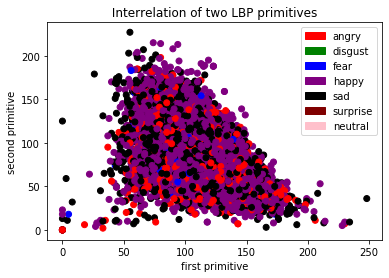

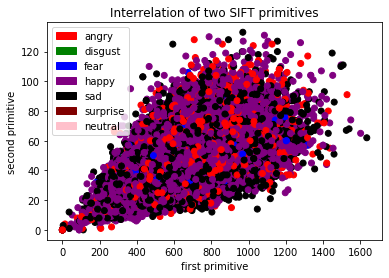

In [0]:
# we pick random rows for both primitive vectors
x_lbp = lbp_vector_app[:,20
y_lbp = lbp_vector_app[:,10]

x_sift = sift_vector_app[:,2]
y_sift = sift_vector_app[:,5]

plt_primitive(x_lbp, y_lbp, ytrain, " Interrelation of two LBP primitives " )
plt_primitive(x_sift, y_sift, ytrain, "Interrelation of two SIFT primitives" )


### Partie 3c: Sauvegarder les vecteurs en csv dans le format FER

---



In [0]:
f=open('lbp24_fer2013.csv','ab')
# Vos résultats ici:
numpy.savetxt(f, lbp_vector_app, delimiter=";", header="apprentissage")
numpy.savetxt(f,  lbp_vector_val, delimiter=";", header="validation")
numpy.savetxt(f,  lbp_vector_test, delimiter=";", header="test")
f.close()

f = open('sift_fer2013.csv', 'ab')
numpy.savetxt("sift_vector_app.csv", sift_vector_app, delimiter=";", header="apprentissage")
numpy.savetxt("sift_vector_val.csv", sift_vector_val, delimiter=";", header="validation")
numpy.savetxt("sift_vector_test.csv",sift_vector_test, delimiter=";", header="test")
f.close()

### Partie 3d: Analyse

### Choix des algorithme pour l'extraction des primitives
Nous avons choisi les algorithme SIFT et LBP pour extraire des descripteurs de nos images. D'abord, SIFT est couramment utilisé ou mentionné lorsqu'il est question de détection faciale dans la littérature scientifique. La faiblesse de cette dernière est dans la difficulté d'extraire des descripteurs lorsque l'image contient un arrière-plan complexe or corrompu avec du bruit. Cela n'est pas le cas pour aucune de nos images, d'où notre choix. Lors de l'entrainement de FER, il existe des images avec aucun descripteur SIFT. Étant donné que cela arrive rarement(20 images), nous les ignorons. Un autre choix aurait pu être SURF, qui est beaucoup plus rapide que SIFT. Cependant, notre code utilisait déjà SIFT et nous avons conclu cet apport ne nous est pas prioritaire.  

Nous avons gardé le même radius que celui dans l'exemple du professeur après quelques expérimentations, car les gains et pertes de précision  étaient similaires autour de ce radius.

### Analyse des graphiques
Lorsque nous avons choisi deux valeurs du vecteur de primitive pour tracer le graphe, nous remarquons que les valeurs ne sont pas discriminantes.En effet, la plus des points forment une masse où les différentes émotions y sont toutes mélangées. À travers les points, il est possible de voir l'abondance de Happy et le manque de disgust. Pour voir quelles valeurs discriminent bien, il faut tester toutes les combinaisons de valeurs dans les vecteurs primitives. Cela va au-delà des attentes de ce laboratoire, alors seulement quelques valeurs ont été testées. Voici les meilleurs résultats.
Source: https://www.researchgate.net/publication/286779754_Image_matching_based_on_LBP_and_SIFT_descriptor



## Partie 4: Construction d'un modèle

<font color=blue>Nous sommes maintenant prêtes pour entraîner notre premier modèle avec les primitives extraites dans la partie 3. On suppose que vous avez deux jeux de primitives, alors vous devez entraîner un modèle pour chaque jeu de primitives.</font>

### (4a) Entraîner un modèle

Vous devez choisir un des algorithmes d'apprentissage suivants et l'entraîner sur les données d'apprentissage (même algorithme pour les deux jeux de primitives):<br>
* [Decision trees](https://scikit-learn.org/stable/modules/tree.html) de scikit-learn. <br>
* [k-NN](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification) de scikit-learn. <br>
* [Naïve Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) de scikit-learn. 

<font color=blue>Pour ce premier modèle, vous n'est pas supposé de régler (optimiser) votre modèle. Vous allez faire ce réglage dans la partie (4b).</font>

Après l'entraînement, vous devez faire des prédictions sur les données de test.

##### À faire:
1. Entraîner un modèle avec l'algorithme d'apprentissage choisi
2. Classifier tous les exemples (ensembles d'apprentissage, validation et test) et reporter les résultats:<br>
 2a. taux de classification correct sur les trois (3) ensembles de données<br>
 2b. matrice de confusion pour l'ensemble de test
3. <font color=blue>Sauvagarder votre modèle dans un fichier. Regarder [model persistence](https://scikitlearn.org/stable/modules/model_persistence.html?highlight=persistence) </font> 
4. Expliquer pourquoi vous avez choisi cet algorithme d'apprentissage (Q1).
5. Faire une analyse des résultats et présenter vos conclusions sur le modèle entraîné (Q2).
6. Concernant vos primitives, sont-elles discriminantes? (Q3)

### Partie 4a: Code:

In [0]:
# Votre code ici
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from joblib import dump, load

# Create KNN classifier
def create_model(X,y) :
  knn = KNeighborsClassifier(n_neighbors = 3)
  # Fit the classifier to the data
  knn.fit(X,y)
  return knn

#taux de classification
def accuracy(X_set, y_set):
  acc = metrics.accuracy_score(X_set, y_set)
  print("accuracy_score: " + '{0:.5f}'.format(acc))
  return acc

def checkModel(knn, xtrain, xtest, xval) :
  ypred = knn.predict(xtest)

  #check accuracy of our model on the train data
  print('Ensemble Apprentissage :')
  accTrain = accuracy(knn.predict(xtrain), ytrain)
  #check accuracy of our model on the validation data
  print('Ensemble de Validation :')
  accVal = accuracy(knn.predict(xval), yval)
  #check accuracy of our model on the test data
  print('Ensemble de test :')
  accTest = accuracy(ypred, ytest)
  
  conf = confusion_matrix(ytest, ypred)
  print(conf)

def predictModel(knn, xtest, ytest):
  ypred = knn.predict(xtest)
  #check accuracy of our model on the test data
  print('Ensemble de test :')
  accTest = accuracy(ypred, ytest)
  
  conf = confusion_matrix(ytest, ypred)
  print(conf)

def createSave(model, name) :
  dump(model, name)

In [0]:
#Model with SIFT primitive
print('Modele knn avec les features SIFT')
knn = create_model(sift_vector_app, ytrain)
checkModel(knn, sift_vector_app, sift_vector_test, sift_vector_val)
createSave(knn, 'knnModelSIFT.joblib')

#Model with lpb primitive
print('Modele knn avec les features LPB')
knn = create_model(lbp_vector_app, ytrain)
checkModel(knn, lbp_vector_app, lbp_vector_test, lbp_vector_val)
createSave(knn, 'knnModelLPB.joblib')

Modele knn avec les features SIFT
Ensemble Apprentissage :
accuracy_score: 0.53196
Ensemble de Validation :
accuracy_score: 0.21343
Ensemble de test :
accuracy_score: 0.20869
[[177  14  85 120  45  17  33]
 [ 17  10  11  12   2   1   2]
 [146   4 144 129  50  24  31]
 [249  18 191 214  91  47  69]
 [145  17 131 148  75  27  51]
 [117   7  62  93  49  58  30]
 [186  18 119 148  61  23  71]]
Modele knn avec les features LPB
Ensemble Apprentissage :
accuracy_score: 0.56763
Ensemble de Validation :
accuracy_score: 0.25717
Ensemble de test :
accuracy_score: 0.25857
[[199  11  84  97  49  22  29]
 [  8  19   3  11   6   6   2]
 [135  12 161  97  57  27  39]
 [233  25 158 284  72  38  69]
 [166  21 103 137  88  21  58]
 [ 91  15  62 111  35  88  14]
 [127  15 125 180  68  22  89]]


### Partie 4a: Résultats et résponses:

#### Vos résultats ici:

| Ensemble SIFT | Taux de classification correct |                               
|----------|--------------------------------|
| App      | 53,20%                         |                   
| Val      | 21,13%                         |                             
| Test     | 20,87%                         |

| Ensemble LPB | Taux de classification correct |                               
|----------|--------------------------------|
| App      | 56,76%                         |                   
| Val      | 25,72%                         |                             
| Test     | 25,86%                         |        

Q1: Nous avons choisi la méthode des l plus proches voisins(knn) parce que le problème est de faire la classification des données selon les sept classes de visages. Avec l'utilisation des données pour faire templates de chaque classe, cela permet facilement de classer l'objet entré dans une catégorie à laquelle celle-ci appartient aux k plus proches voisins selon la distance.

Q2: Les taux de classification indiquent que le modèle avec les primitives SIFT fait un surapprentissage de l'ensemble de données d'entrainement, comme pour le modèle avec les primitives LPB qui fait aussi un surapprentisage dans l'ensemble de données d'entrainement selon les résultats des taux de classification pour les ensembles de validation et de test.

Q3: La performance avec les primitives SIFT et LPB pour chaque modèle n'est pas très efficace pour mettre en évidence les différences entre observations des classes et minimiser les différences possibles dans les observations d'une même classe.

### (4b) Réglage du modèle

Probablement vous avez outperformé le modèle << baseline >>, mais est-ce qu'on peut mieux performer? Est-ce qu'on peut faire un << fine-tuning >> de notre modèle? Quels sont les paramètres que vous pouvez ajuster pour améliorer la performance?

##### À faire:
1. Lister les principaux paramètres de votre modèle qui peuvent aider à améliorer sa performance.
2. Choisir quelques paramètres (au moins 2) et tourner un << grid search>> pour trouver les meilleures valeurs pour ces paramètres.
3. Une fois que vous avez trouvé le meilleur modèle, utiliser ce modèle pour classifier tous les exemples (apprentissage, validation, test) et reporter les résultats:<br>
 3a. taux de classification correct sur les 3 ensembles<br>
 3b. matrice de confusion pour l'ensemble de test
4. Explique pourquoi vous avez choisi ces paramètres.
5. Faire une analyse des résultats et présenter vos conclusions sur ce modèle << fine- tuned >>

### Partie 4b: Code:

1. Lister les principaux paramètres de votre modèle qui peuvent aider à améliorer sa performance.
``
Les principaux paramètres sont le nombre de voisins(n_neighbors), la fonction de poids(weights), l'algorithme pour calculer les plus proches voisins. 
``

4. Explique pourquoi vous avez choisi ces paramètres.
``
Les paramètres choisis pour faire les réglages du modèle sont le k(soit le nombre de voisin plus proche) et le poids des k plus proches voisin.
``

In [0]:
from sklearn.model_selection import GridSearchCV
#Grid Search
def gridSearch(_model,vector_app, X_test) :
  # define the parameter values that should be searched
  k_range = list(range(9, 31))

  # Another parameter besides k that we might vary is the weights parameters
  # default options --> uniform (all points in the neighborhood are weighted equally)
  # another option --> distance (weights closer neighbors more heavily than further neighbors)

  # we create a list
  weight_options = ['uniform', 'distance']
  # create a parameter grid: map the parameter names to the values that should be searched
  # dictionary = dict(key=values, key=values)
  param_grid = dict(n_neighbors=k_range, weights=weight_options)

  # instantiate and fit the grid
  # exhaustive grid-search because it's trying every combination
  # 10-fold cross-validation is being performed 30 x 2 = 60 times

  grid = GridSearchCV(_model, param_grid, cv=10, scoring='accuracy')
  grid.fit(vector_app, ytrain)

  predicted = grid.predict(X_test)
  acc = accuracy(predicted, ytest)

  # examine the best model
  print(grid.best_score_)
  print(grid.best_params_)

def create_grid_search(_model, xtrain,ytrain):
  # define the parameter values that should be searched
  k_range = list(range(9, 31))

  # Another parameter besides k that we might vary is the weights parameters
  # default options --> uniform (all points in the neighborhood are weighted equally)
  # another option --> distance (weights closer neighbors more heavily than further neighbors)

  # we create a list
  weight_options = ['uniform', 'distance']
  # create a parameter grid: map the parameter names to the values that should be searched
  # dictionary = dict(key=values, key=values)
  param_grid = dict(n_neighbors=k_range, weights=weight_options)

  # instantiate and fit the grid
  # exhaustive grid-search because it's trying every combination
  # 10-fold cross-validation is being performed 30 x 2 = 60 times

  grid = GridSearchCV(_model, param_grid, cv=10, scoring='accuracy')
  grid.fit(xtrain, ytrain)
  return grid

def predict_grid(grid, xtest, ytest):
  predicted = grid.predict(xtest)
  acc = accuracy(predicted, ytest)
  conf = confusion_matrix(ytest, predicted)
  print(conf)
  # examine the best model
  print(grid.best_score_)
  print(grid.best_params_)

In [0]:
# Grid searh https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/
_model = load("knnModelSIFT.joblib")
print('Grid search sur le modele avec SIFT')
gridSearch(_model, sift_vector_app)

In [0]:
# Grid searh
_model = load("knnModelLPB.joblib")
print('Grid search sur le modele avec LPB')
gridSearch(_model, lbp_vector_app)

### Partie 4b: Résultats et résponses:

In [0]:
# Vos résultats ici:
knn = KNeighborsClassifier(n_neighbors = 28, weights='distance')
knn.fit(sift_vector_app,ytrain)
#Model with sift primitive
checkModel(knn, sift_vector_app, sift_vector_test, sift_vector_val)
print()
knn = KNeighborsClassifier(n_neighbors = 30, weights='distance')
knn.fit(lbp_vector_app,ytrain)
#Model with lpb primitive
checkModel(knn, lbp_vector_app, lbp_vector_test, lbp_vector_val)

Ensemble Apprentissage :
accuracy_score: 0.99969
Ensemble de Validation :
accuracy_score: 0.28922
Ensemble de test :
accuracy_score: 0.27417
[[ 74   0  56 221  63  16  61]
 [  3   8   4  24   8   3   5]
 [ 47   0  89 251  63  19  59]
 [ 58   0  72 467 137  38 107]
 [ 37   0  58 269 112  29  89]
 [ 12   0  35 163  51  89  66]
 [ 38   0  41 291  89  22 145]]
Ensemble Apprentissage :
accuracy_score: 1.00000
Ensemble de Validation :
accuracy_score: 0.31931
Ensemble de test :
accuracy_score: 0.33408
[[120   0  48 183  67  29  44]
 [  2  16   2  19   7   7   2]
 [ 41   0 115 201  75  32  64]
 [ 48   0  62 508 130  47  84]
 [ 53   0  40 248 146  32  75]
 [ 29   1  28 135  45 154  24]
 [ 30   0  36 295  96  29 140]]


5. Faire une analyse des résultats et présenter vos conclusions sur ce modèle << fine- tuned >>
``
Les modèles sont vraiment en surapprentissage avec selon les taux de classification obtenue avec l'ensemble d'entrainement comparé aux taux avec les ensembles validation et test. Les résultats sont un peu meilleurs que sans l'optimisation des paramètres dans les modèles.
``

## Partie 5: Réduction de la dimensionnalité

### Bibliotèques Python pour la reduction de la dimensionnalité

* [Transformation algorithms](https://scikit-learn.org/stable/modules/decomposition.html#decompositions)
* [Feature selection algorithms](https://scikit-learn.org/stable/modules/feature_selection.html)

##### À faire:
1. Choisir un algorithme de transformation de primitives et un algorithme de sélection des primitives et réduire la dimensionnalité de vos vecteurs de primitives (Partie 3).
2. Choisir les deux meilleures primitives et ploter un graphique pour visualiser si ces primitives sont capables de bien séparer les sept (7) classes.
3. Faire une analyse des résultats et présenter vos conclusions sur ces primitives.

### Partie 5a: Code:

In [0]:
#//Selection des primitives//:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

fs = VarianceThreshold(threshold = 40)
print(Xtrain.shape,Xval.shape)

X_train_FS_Th = fs.fit_transform(sift_vector_app)
print(X_train_FS_Th.shape)

fs.get_support()
X_train_df = pd.DataFrame(data = sift_vector_app)
X_test_df  = pd.DataFrame(data = sift_vector_test)
X_train_df_FS_Th = X_train_df[X_train_df.columns[fs.get_support(indices=True)]]
X_test_df_FS_Th  = X_test_df[X_test_df.columns[fs.get_support(indices=True)]]
print(X_train_df.shape, X_test_df.shape)
print(X_train_df_FS_Th.shape, X_test_df_FS_Th.shape)

fs_lpd = VarianceThreshold(threshold = 40)
print(Xtrain.shape,Xval.shape)

X_train_fs_lpd_Th = fs_lpd.fit_transform(lbp_vector_app)
print(X_train_fs_lpd_Th.shape)

fs_lpd.get_support()
X_train_df = pd.DataFrame(data = lbp_vector_app)
X_test_df  = pd.DataFrame(data = lbp_vector_test)
X_train_df_fs_lpd_Th = X_train_df[X_train_df.columns[fs_lpd.get_support(indices=True)]]
X_test_df_fs_lpd_Th  = X_test_df[X_test_df.columns[fs_lpd.get_support(indices=True)]]
print(X_train_df.shape, X_test_df.shape)
print(X_train_df_fs_lpd_Th.shape, X_test_df_fs_lpd_Th.shape)

(28709, 1, 48, 48) (3589, 1, 48, 48)
(28709, 48)
(28709, 129) (3589, 129)
(28709, 48) (3589, 48)
(28709, 1, 48, 48) (3589, 1, 48, 48)
(28709, 26)
(28709, 27) (3589, 27)
(28709, 26) (3589, 26)


In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

def pcaTransformation(vector_train, ytrain):
  pca = PCA(n_components=2)

  principalComponents = pca.fit_transform(StandardScaler().fit_transform(vector_train))
  
  print(pca.explained_variance_ratio_)
  print(pca.singular_values_)

  principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])

  df = pd.DataFrame(ytrain,columns=['face'])
  df['face'] = ytrain.tolist();

  finalDf = pd.concat([principalDf, df], axis = 1)

  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title('2 component PCA', fontsize = 20)
  faces = [0, 1, 2,3, 4, 5,6]
  colors = ['r', 'g', 'b', 'purple', 'orange', 'black', 'pink']
  for face, color in zip(faces,colors):
      indicesToKeep = finalDf['face'] == face
      ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                , finalDf.loc[indicesToKeep, 'principal component 2']
                , c = color
                , s = 10)
  ax.legend(labels)
  ax.grid()
  return pca, principalComponents

### Partie 5a: Résultats et résponses:

Selection SIFT:


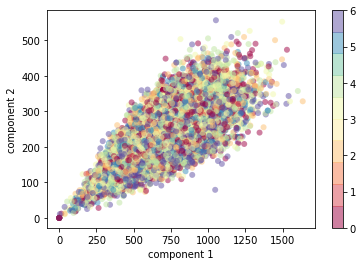

In [0]:
print('Selection SIFT:')
plt.scatter(X_train_df_FS_Th.iloc[:, 0], X_train_df_FS_Th.iloc[:, 1],
            c = ytrain, edgecolor='none', alpha=0.5,
            cmap = plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Selection LPB:


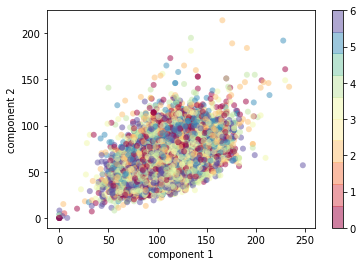

In [0]:
print('Selection LPB:')
plt.scatter( X_train_df_fs_lpd_Th.iloc[:, 0],  X_train_df_fs_lpd_Th.iloc[:, 1],
            c = ytrain, edgecolor='none', alpha=0.5,
            cmap = plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

PCA transformation SIFT:
[0.46527627 0.01151059]
[1312.68142926  206.46799708]


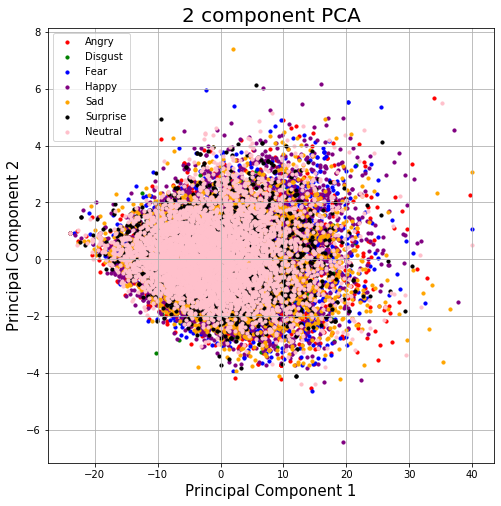

In [0]:
print('PCA transformation SIFT:')
pcaSIFT, principalComponentsSIFT = pcaTransformation(sift_vector_app,ytrain)

PCA transformation lpb:
[0.298052  0.1418712]
[480.65883997 331.61795671]


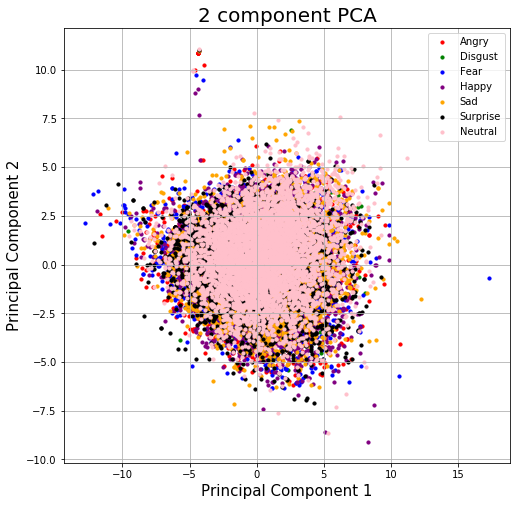

In [0]:
print('PCA transformation lpb:')
pcaLPB, principalComponentsLPB = pcaTransformation(lbp_vector_app,ytrain)

### (5b) Rentraîner le modèle de la partie 4a

Vous devez rentraîner le modèle et l'entraîner sur les données d'apprentissage.<br>
Après l'entraînement, vous devez faire des prédictions sur les données de test.

### Partie 5b: Code:

In [0]:
# Retrainer notre modèle de selection de feature avec Filter univariate Variance Threhold 
#knn = KNeighborsClassifier(n_neighbors = 30, weights='distance')
#del_FS_Th = knn.fit(X_train_df_FS_Th, ytrain)
#Evaluating the test dataset 
#Y_test_FS_Th_pred       = knn.predict(X_test_df_FS_Th)
#acc_digits_test_FS_Th   = accuracy(ytest, Y_test_FS_Th_pred )
#acc=  0.33408  #Accuracy obtenue après avoir reglé le modele avant la selection des features
#print("Correct classification rate for the test dataset (original feature set)      =  "+str(round(acc*100,4))+"%")
#print("Correct classification rate for the test dataset (variance threshold 45-dim) =  "+str(round(acc_digits_test_FS_Th*100,4))+"%")

In [0]:
def retrain_with_PCA(pca,x_Train, x_Test) :
  x_train_pca = pca.transform(x_Train)

  #creer un modele knn
  knn = create_model(x_train_pca, ytrain)

  #prediction sur l'ensemble de test apres la transformation pca
  ypred = knn.predict(pca.transform(x_Test))

  accuracy(ypred, ytest)
  conf = confusion_matrix(ytest, ypred)
  print(conf)
  return knn

### Partie 5b: Résultats et résponses:

In [0]:
print('\nRésultats Threhold: ')
knn_threhold = create_model(X_train_df_FS_Th,ytrain)
ypred = knn_threhold.predict(X_test_df_FS_Th)
accuracy(ytest,ypred)
conf = confusion_matrix(ytest, ypred)
print(conf)

knn_threhold_LPB = create_model( X_train_df_fs_lpd_Th,ytrain)
ypred = knn_threhold_LPB.predict(X_test_df_fs_lpd_Th )
accuracy(ytest,ypred)
conf = confusion_matrix(ytest, ypred)
print(conf)

print('\nRésultats PCA: ')
print('PCA avec SIFT: ')
knn_pca_SIFT = retrain_with_PCA(pcaSIFT,sift_vector_app,sift_vector_test)
print('PCA avec LPB: ')
knn_pca_LPB = retrain_with_PCA(pcaLPB,lbp_vector_app,lbp_vector_test)


Résultats Threhold: 
accuracy_score: 0.21594
[[169  12  97 123  37  16  37]
 [ 12  11  12  12   2   2   4]
 [171   5 145 106  51  22  28]
 [239  15 178 240  91  44  72]
 [158  18 124 156  74  23  41]
 [118   6  65  97  37  65  28]
 [199  16 124 137  60  19  71]]
accuracy_score: 0.25550
[[197   9  79  96  51  23  36]
 [  8  20   3  11   5   6   2]
 [134  12 160  96  58  29  39]
 [237  24 156 281  71  39  71]
 [171  21 100 137  86  21  58]
 [ 96  15  60 110  33  88  14]
 [135  16 125 180  63  22  85]]

Résultats PCA: 
PCA avec SIFT: 
accuracy_score: 0.19866
[[149  19 103 136  33  17  34]
 [ 17  11   8   9   3   0   7]
 [143  19 114 136  45  24  47]
 [221  23 189 243  86  42  75]
 [149  19 119 147  78  26  56]
 [110   8  84  90  28  60  36]
 [177  15 110 170  61  35  58]]
PCA avec LPB: 
accuracy_score: 0.20730
[[168  10  94 123  46  24  26]
 [ 10   8   3  12  11   2   9]
 [131  10 125 127  46  26  63]
 [238  26 182 233  72  48  80]
 [164  15 119 153  65  31  47]
 [103  11  88 100  32  55

### (5c) Réglage du modèle

Vous devez reoptimiser votre nouveau modèle et l'entraîner sur les données d'apprentissage.
Après l'entraînement, vous devez faire des prédictions sur les données de test.

### Partie 5c: Code:

In [0]:
# Votre code ici
gridSearch(knn_threhold, X_train_df_FS_Th, X_test_df_FS_Th)
gridSearch(knn_threhold_LPB, X_train_df_fs_lpd_Th , X_test_df_fs_lpd_Th )

gridSearch(knn_pca_SIFT, pcaSIFT.transform(sift_vector_app), pcaSIFT.transform(sift_vector_test))
gridSearch(knn_pca_LPB, pcaLPB.transform(lbp_vector_app), pcaLPB.transform(lbp_vector_test))

GridSearch:
accuracy_score: 0.26693
0.2769170984141548
{'n_neighbors': 30, 'weights': 'distance'}
accuracy_score: 0.25522
0.26510917173658977
{'n_neighbors': 30, 'weights': 'distance'}
accuracy_score: 0.25439
0.2714826991530104
{'n_neighbors': 29, 'weights': 'distance'}

### Partie 5c: Résultats et résponses:

In [0]:
# Vos résultats ici
print('\nRésultats Threhold: ')
knn = KNeighborsClassifier(n_neighbors = 30, weights='distance')
knn.fit(X_train_df_FS_Th, ytrain)
#Evaluating the test dataset 
Y_test_FS_Th_pred       = knn.predict(X_test_df_FS_Th)
print('Threhold avec SIFT: ')
acc_digits_test_FS_Th   = accuracy(ytest, Y_test_FS_Th_pred )

knn = KNeighborsClassifier(n_neighbors = 30, weights='distance')
knn.fit(X_train_df_fs_lpd_Th , ytrain)
#Evaluating the test dataset 
Y_test_fs_lpd_Th_pred        = knn.predict(X_test_df_fs_lpd_Th)
print('Threhold avec LPB: ')
acc    = accuracy(ytest,   Y_test_fs_lpd_Th_pred)

# Résultats avec la transformation PCA
print('\nRésultats PCA: ')
knn = KNeighborsClassifier(n_neighbors = 28, weights='distance')
knn.fit(principalComponentsSIFT, ytrain)
#prediction sur l'ensemble de test apres la transformation pca
ypred = knn.predict(pcaSIFT.transform(sift_vector_test))
print('PCA avec SIFT: ')
acc = accuracy(ypred, ytest)

knn = KNeighborsClassifier(n_neighbors = 29, weights='distance')
knn.fit(pcaLPB.transform(lbp_vector_app), ytrain)
#prediction sur l'ensemble de test apres la transformation pca
ypred = knn.predict(pcaLPB.transform(lbp_vector_test))
print('PCA avec LPB: ')
acc =accuracy(ypred, ytest)


Résultats Threhold: 
Threhold avec SIFT: 
accuracy_score: 0.26693
Threhold avec LPB: 
accuracy_score: 0.33018

Résultats PCA: 
PCA avec SIFT: 
accuracy_score: 0.16578
PCA avec LPB: 
accuracy_score: 0.25439


3. Faire une analyse des résultats et présenter vos conclusions sur ces primitives.

## Partie 6: Analyse qualitative

Choisir dans l'ensemble de test, exemples de visages bien et mal classifié et montrer ces exemples avec la vraie étiquette et la prédiction faite par votre meilleur modèle.

<font color=magenta> 
## Partie 7: Cross-Dataset Challenge

Vous devez tester vos modèles (déjà entraînés et testés sur FER) sur un autre ensemble de données pour eváluer la capacité de géneralisation. 
    
L’ensemble de données à tester est le Jaffe dataset qui contient 213 images de 7 expressions faciales pose par 10 modèles féminines japonaises. Chaque image a été étiquetée dans 6 adjectives d’émotion par 60 sujets japonaises. 

L’ensemble de données originel contient des images 256x256 en niveau de gris, dans le format .tiff, sans compression.

Vous avez les données redimensionnées à 48x48 pixels ('jaffe_48x48.csv'), aussi que les données dans la dimension originelle ('jaffe_256x256.csv'). 

* Angry (30 exemples):   Y_test[0:30]   = 0 
* Disgust (29 exemples): Y_test[30:59]  = 1
* Fear (32 exemples): Y_test[59:91]  = 2 
* Happy (31 exemples): Y_test[91:122] = 3 
* Neutral (30 exemples): Y_test[122:152]= 6 
* Surprise (31 exemples): Y_test[152:183]= 5 
* Sad (30 exemples): Y_test[183:213]= 4 

</font> 

<font color=magenta> 
### (7a) Charger le fichier de données de test
</font>

In [0]:
import numpy as np
import numpy as np

# Read from file
X_test_jaffe_48 = np.loadtxt('jaffe_48x48.csv', delimiter=',', dtype=int)
X_test_jaffe_256 = np.loadtxt('jaffe_256x256.csv', delimiter=',', dtype=int)
y_test_jaffe = np.loadtxt('jaffe_labels.csv', delimiter=',', dtype=int)

# reshape to be [samples][pixels][width][height]
X_test_jaffe_48  = X_test_jaffe_48.reshape(X_test_jaffe_48.shape[0], 1, 48, 48).astype('uint8')
X_test_jaffe_256  = X_test_jaffe_256.reshape(X_test_jaffe_256.shape[0], 1, 256, 256).astype('uint8')

<font color=magenta> 
### (7b) Visualisation des visages de Jaffe
</font>

In [0]:

import matplotlib.pyplot as plt
def getLabel(id):
    return ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'][id]
plt.figure(figsize=(10, 10))
j = 0
for i in [5, 40, 70, 105, 135, 171, 191]:
    plt.subplot(330 + 1 + j)
    plt.imshow(np.squeeze(X_test_jaffe_256[i], axis=0),cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('Label = %s' % getLabel(y_test_jaffe[i]), fontsize = 12)
    j = j + 1
plt.show()

<font color=magenta> 
##### À faire:
1. Tester vos modèles sur les 213 images de Jaffe dataset.
2. Faire une analyse des résultats et présenter vos conclusions sur la capacité de generalisation de vos modèles.
</font>

In [0]:
fig, ax = plt.subplots()

ax.hist(y_test_jaffe, bins = [0,1,2,3,4,5,6,7]) 

ax.set_xticklabels([])
#(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
mticks = ax.get_xticks()
ax.set_xticks((mticks[:-1]+mticks[1:])/2+1, minor=True)
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xticklabels(labels, minor=True)
plt.show()

### (7c) Entrainement de Jaffe avec nos models

### Entrainement avec KNN de base

---



In [0]:
#extract feature vectors
lbp_vector_48, sift_vector_48 = create_feature_vectors(X_test_jaffe_48, y_test_jaffe)
lbp_vector_256, sift_vector_256 = create_feature_vectors(X_test_jaffe_256, y_test_jaffe)

In [0]:
# Train with base KNN

#Model with SIFT primitive
print('Modele knn avec SIFT sur le model 48x48')
predictModel(knn_SIFT,  sift_vector_48, y_test_jaffe )

#Model with lpb primitive
print('Modele knn avec LPB sur le model 48x48')
predictModel(knn_LBP, lbp_vector_48, y_test_jaffe)

#Model with SIFT primitive
print('Modele knn avec SIFT sur le model 256x256')
predictModel(knn_SIFT,  sift_vector_256, y_test_jaffe )

#Model with lpb primitive
print('Modele knn avec LPB sur le model 256x256')
predictModel(knn_LBP, lbp_vector_256, y_test_jaffe)

### Entrainement avec Grid Search CV

---



In [0]:
# Train with augmented KNN
#Train grid model
grid_SIFT = create_grid_search(knn_SIFT, sift_vector_app, ytrain)
grid_LBP = create_grid_search(knn_LBP, lbp_vector_app, ytrain)

In [0]:
print('Modele knn avec SIFT sur le model 48x48')
predict_grid(grid_SIFT, sift_vector_48, y_test_jaffe )
print()

#Model with lpb primitive
print('Modele knn avec LPB sur le model 48x48')
predict_grid(grid_LBP, lbp_vector_48, y_test_jaffe )
print()

#Model with SIFT primitive
print('Modele knn avec SIFT sur le model 256x256')
predict_grid(grid_SIFT, sift_vector_256, y_test_jaffe )
print()

#Model with lpb primitive
print('Modele knn avec LPB sur le model 256x256')
predict_grid(grid_LBP, lbp_vector_256, y_test_jaffe )

### Entrainement avec Grid Search PCA sur Jaffe

---



In [0]:
#Train grid model
grid_SIFT_PCA = create_grid_search(knn_pca_SIFT, pcaSIFT.transform(sift_vector_app), ytrain)
grid_LBP_PCA = create_grid_search(knn_pca_LPB, pcaLPB.transform(lbp_vector_app), ytrain)


In [0]:
# Votre code ici
print('Modele knn avec SIFT sur le model 48x48')

predict_grid(grid_SIFT_PCA, pcaSIFT.transform(sift_vector_48), y_test_jaffe )
print()

#Model with lpb primitive
print('Modele knn avec LPB sur le model 48x48')
predict_grid(grid_LBP_PCA, pcaLPB.transform(lbp_vector_48), y_test_jaffe )
print()

#Model with SIFT primitive
print('Modele knn avec SIFT sur le model 256x256')
predict_grid(grid_SIFT_PCA, pcaSIFT.transform(sift_vector_256), y_test_jaffe )
print()

#Model with lpb primitive
print('Modele knn avec LPB sur le model 256x256')
predict_grid(grid_LBP_PCA, pcaLPB.transform(lbp_vector_256), y_test_jaffe )

Modele knn avec SIFT sur le model 48x48
accuracy_score: 0.13146
[[ 0  0  0 29  0  0  1]
 [ 0  0  0 29  0  0  0]
 [ 0  0  1 31  0  0  0]
 [ 0  0  5 26  0  0  0]
 [ 0  0  0 30  0  0  0]
 [ 0  0  1 30  0  0  0]
 [ 0  0  3 26  0  0  1]]
0.271343481138319
{'n_neighbors': 29, 'weights': 'distance'}

Modele knn avec LPB sur le model 48x48
accuracy_score: 0.19249
[[ 4  0  2  7  1  8  8]
 [ 3  0  0  9  0  8  9]
 [ 0  0  7 11  4  4  6]
 [ 4  0  1 16  1  2  7]
 [ 2  1  4 15  2  3  3]
 [ 0  0  5 11  2  7  6]
 [ 1  0  4 16  1  3  5]]
0.271343481138319
{'n_neighbors': 29, 'weights': 'distance'}

Modele knn avec SIFT sur le model 256x256
accuracy_score: 0.14085
[[ 0  0  0  0 30  0  0]
 [ 0  0  0  0 29  0  0]
 [ 0  0  0  0 32  0  0]
 [ 0  0  0  0 31  0  0]
 [ 0  0  0  0 30  0  0]
 [ 0  0  0  0 31  0  0]
 [ 0  0  0  0 30  0  0]]
0.271343481138319
{'n_neighbors': 29, 'weights': 'distance'}

Modele knn avec LPB sur le model 256x256
accuracy_score: 0.15023
[[ 0  0 30  0  0  0  0]
 [ 0  0 29  0  0  0  0]
 

### Entrainement avec PCA sur Jaffe

---







In [0]:
# Résultats avec la transformation PCA
print('\nRésultats PCA: ')
knn = KNeighborsClassifier(n_neighbors = 28, weights='distance')
knn.fit(principalComponentsSIFT, ytrain)

#prediction sur l'ensemble de test apres la transformation pca
ypred_sift_48 = knn.predict(pcaSIFT.transform(sift_vector_48))
ypred_sift_256 = knn.predict(pcaSIFT.transform(sift_vector_256))

print('PCA avec SIFT: ')
print('Modele knn avec SIFT sur le model 48x48')
acc_sift_48 = accuracy(ypred_sift_48, y_test_jaffe)
print(confusion_matrix(y_true=y_test_jaffe, y_pred= ypred_sift_48))
print()

print('Modele knn avec SIFT sur le model 256x256')
acc_sift_256 = accuracy(ypred_sift_256, y_test_jaffe)
print(confusion_matrix(y_true= y_test_jaffe, y_pred= ypred_sift_256))
print()

knn = KNeighborsClassifier(n_neighbors = 29, weights='distance')
knn.fit(pcaLPB.transform(lbp_vector_app), ytrain)

#prediction sur l'ensemble de test apres la transformation pca
ypred_lbp_48 = knn.predict(pcaLPB.transform(lbp_vector_48))
ypred_lbp_256 = knn.predict(pcaLPB.transform(lbp_vector_256))

print('PCA avec LPB: ')
#Model with lpb primitive
print('Modele knn avec LPB sur le model 48x48')
acc_lbp_48 =accuracy(ypred_lbp_48, y_test_jaffe)
print(confusion_matrix(y_true=y_test_jaffe,y_pred= ypred_lbp_48))
print()

print('Modele knn avec LPB sur le model 256x256')
acc_lbp_256 =accuracy(ypred_lbp_256, y_test_jaffe)
print(confusion_matrix(y_true=y_test_jaffe,y_pred= ypred_lbp_256))


Résultats PCA: 
PCA avec SIFT: 
Modele knn avec SIFT sur le model 48x48
accuracy_score: 0.14085
[[ 0  0  0  0 30  0  0]
 [ 0  0  0  0 29  0  0]
 [ 0  0  0  0 32  0  0]
 [ 0  0  0  0 31  0  0]
 [ 0  0  0  0 30  0  0]
 [ 0  0  0  0 31  0  0]
 [ 0  0  0  0 30  0  0]]

Modele knn avec SIFT sur le model 256x256
accuracy_score: 0.14085
[[ 0  0  0  0 30  0  0]
 [ 0  0  0  0 29  0  0]
 [ 0  0  0  0 32  0  0]
 [ 0  0  0  0 31  0  0]
 [ 0  0  0  0 30  0  0]
 [ 0  0  0  0 31  0  0]
 [ 0  0  0  0 30  0  0]]

PCA avec LPB: 
Modele knn avec LPB sur le model 48x48
accuracy_score: 0.19249
[[ 4  0  2  7  1  8  8]
 [ 3  0  0  9  0  8  9]
 [ 0  0  7 11  4  4  6]
 [ 4  0  1 16  1  2  7]
 [ 2  1  4 15  2  3  3]
 [ 0  0  5 11  2  7  6]
 [ 1  0  4 16  1  3  5]]

Modele knn avec LPB sur le model 256x256
accuracy_score: 0.15023
[[ 0  0 30  0  0  0  0]
 [ 0  0 29  0  0  0  0]
 [ 0  0 32  0  0  0  0]
 [ 0  0 31  0  0  0  0]
 [ 0  0 30  0  0  0  0]
 [ 0  0 31  0  0  0  0]
 [ 0  0 30  0  0  0  0]]


### Entrainement de Threshold Variance 

---



In [0]:
fs = VarianceThreshold(threshold = 40)

X_train_FS_Th = fs.fit_transform(sift_vector_app)

fs.get_support()
X_train_df = pd.DataFrame(data = sift_vector_app)
X_test_df_sift_48  = pd.DataFrame(data = sift_vector_48)
X_test_df_sift_256  = pd.DataFrame(data = sift_vector_256)

X_train_df_FS_Th = X_train_df[X_train_df.columns[fs.get_support(indices=True)]]
X_test_df_FS_Th_sift_48  = X_test_df_sift_48[X_test_df_sift_48.columns[fs.get_support(indices=True)]]
X_test_df_FS_Th_sift_256  = X_test_df_sift_256[X_test_df_sift_256.columns[fs.get_support(indices=True)]]


fs_lpd = VarianceThreshold(threshold = 40)


X_train_fs_lpd_Th = fs_lpd.fit_transform(lbp_vector_app)

#fs_lpd.get_support()
X_train_df = pd.DataFrame(data = lbp_vector_app)
X_test_df_lbp_48  = pd.DataFrame(data = lbp_vector_48)
X_test_df_lbp_256  = pd.DataFrame(data = lbp_vector_256)
X_train_df_fs_lpd_Th = X_train_df[X_train_df.columns[fs_lpd.get_support(indices=True)]]
X_test_df_fs_Th_lbp_48  = X_test_df_lbp_48[X_test_df_lbp_48.columns[fs_lpd.get_support(indices=True)]]
X_test_df_fs_Th_lbp_256  = X_test_df_lbp_48[X_test_df_lbp_256.columns[fs_lpd.get_support(indices=True)]]


In [0]:
print('\nRésultats Threhold: ')

#create models 
knn_threshold = create_model(X_train_df_FS_Th,ytrain)
knn_threshold_lbp = create_model(X_train_df_fs_lpd_Th,ytrain)

print('Modele knn avec SIFT sur le model 48x48')
ypred = knn_threshold.predict(X_test_df_FS_Th_sift_48)
accuracy(y_test_jaffe,ypred)
conf = confusion_matrix(y_test_jaffe, ypred)
print(conf)
print()

print('Modele knn avec SIFT sur le model 256x256')
ypred = knn_threshold.predict(X_test_df_FS_Th_sift_256 )
accuracy(y_test_jaffe,ypred)
conf = confusion_matrix(y_test_jaffe, ypred)
print(conf)

print('Modele knn avec LBP sur le model 48x48')
ypred = knn_threshold_lbp.predict(X_test_df_fs_Th_lbp_48)
accuracy(y_test_jaffe,ypred)
conf = confusion_matrix(y_test_jaffe, ypred)
print(conf)
print()

print('Modele knn avec LBP sur le model 256x256')
ypred = knn_threshold_lbp.predict(X_test_df_fs_Th_lbp_256 )
accuracy(y_test_jaffe,ypred)
conf = confusion_matrix(y_test_jaffe, ypred)
print(conf)

### Entrainement de Threshold Variance + grid search 

---



In [0]:
X_train_df_sift = pd.DataFrame(data = sift_vector_app)
X_train_df_lbp = pd.DataFrame(data = lbp_vector_app)

X_train_df_FS_Th_sift = X_train_df_sift[X_train_df_sift.columns[fs.get_support(indices=True)]]
#problem avec le vecteur LBP ci-dessous, alors le model est impossible à créer
#X_train_df_FS_Th_lbp = X_train_df_lbp[X_train_df_lbp.columns[fs.get_support(indices=True)]]

#Train grid model
grid_SIFT_V_TH = create_grid_search(knn_threshold,X_train_df_sift, ytrain)
#grid_LBP_V_TH = create_grid_search(knn_threshold_lbp, X_train_df_lbp, ytrain)

In [0]:
# Votre code ici
print('Modele knn avec SIFT sur le model 48x48')

predict_grid(grid_SIFT_V_TH,X_test_df_FS_Th_sift_48 , y_test_jaffe )
print()

#Model with lpb primitive
#print('Modele knn avec LPB sur le model 48x48')
#predict_grid(grid_LBP_V_TH,X_test_df_fs_Th_lbp_48 , y_test_jaffe )
#print()

#Model with SIFT primitive
print('Modele knn avec SIFT sur le model 256x256')
predict_grid(grid_SIFT_V_TH, X_test_df_FS_Th_sift_256, y_test_jaffe )
print()

#Model with lpb primitive
#print('Modele knn avec LPB sur le model 256x256')
#predict_grid(grid_LBP_V_TH, X_test_df_fs_Th_lbp_256, y_test_jaffe )

## Partie Final: Conclusion

##### À faire:
1. Résumer et comparer les principaux résultats .
2. Faire une analyse des résultats obtenus et présenter vos conclusions sur les différents modèles que vous avez entraînés.

### Partie Final: Résultats et résponses:


### Analyse des résultats de nos modèles 
Pour analyse le nouveau dataset, nous allons utiliser quatres modèles. Le permier est un KNN de base, le deuxième model est le même KNN avec le Grid search d'ajouté et notre troisième model est un grid search avec PCA. Notre hypothèse d'emblée est que le KNN simple va avoir la plus faible précision et le grid search aura la précision la plus importante. Nous essayons d'avoir au moins au-dessus d'une estimation aléatoire, soit plus haut que 14.3%. 

### Analyse du KNN de base
D'abord, nous allons nous pencher sur notre KNN de base. Les résultats frôlent l'aléatoire, où même le SIFT du dataset 256x256 est en-dessous de 14.3% avec 13.6%. De plus, nous pouvons voir dans la matrice de confusion, pour les models SIFT et LBP du dataset 256x256, notre KNN à favoriser certaines emotions. C'est une tendance que nous allons voir dans les models à venir aussi. Pour le SIFT, le model favorise les émotions 0 et 2, soit Anger et Fear. Pour le LBP, c'est le 2.  Dans Jaffe, aucune émotion est est sur-représentée, mais dans FER, ce sont les émotion Happy, Sad et Neutral qui y sont en une quantité importante. Dans les deux cas, ce ne sont pas les raisons pourquoi notre modèle favorise ces émotions. Une hypothèse est ce que nos primitives discriminent vers 0 et 2 et en ce faisant, ils sont répartis de sorte à être proche de nos points de tests.   


### Analyse du modèle utilisant la méthode PCA
 Avec un K de 29, il est possible d'avoir 27% de précision potentiellement. Pour le dataset 256x256, notre modèle donne la priorité à l'étiquette 4 (pour SIFT) et 2 pour (LBP). 

### Analyse de grid search avec PCA
Comme le grid search précédent, avec un K de 29, il est possible d'avoir 27% de précision. Pour le dataset 256x256, notre modèle préfère le 2 (pour SIFT) et 0 et 2 (pour LBP).

###Analyse de PCA, varience threshold et le grid search
 Si nous comparons notre modèle KNN entrainé sur des données où la méthode PCA ou le varience threshold sont appliquées avec notre modèle grid search, nous remarquons que nos résultats sont quasi-identiques. D'une part, nous remarquons son bias vers certaines émotions pour les images 256x256 (plus de détails dans le paragraphe suivant). D'autre part, le PCA ne contribue pas à l'amélioration ou rendre  de nos résultats. Les meilleures précisions dans ce laboratoire ont été données par le grid search simple, soit une 32.05% avec un K de 30. Selon la théorie vue, le PCA + grid search devrait nous donner le meilleur résultat possible. Compte tenu que le variance threshold est utilisé pour diminuer la quantité de données utilisées, il va de soi que nous perdons une partie de notre précision. Il se pourrait qu'il n'y a pas assez de données pour voir les effets du PCA ou du varience threshold.

Il est clair que ,pour le dataset Jaffe 256x256, notre modèle à son meilleur  favorise l'émotion 2 peu importe les vecteurs (SIFT ou LBP) donnés. En effet, il prédit une  ou deux émotions et compte tenu que les émotions sont bien réparties dans le dataset Jaffe; il a une précision de (1/7). Dans d'autres mots, c'est aléatoire. La raison la plus probable est que notre model KNN est sur-entrainé avec FER et il est incapable de généraliser pour un model (42^2) aussi grand. Si nous avions eu des datasets 256x256 pour l'entrainement, il serait possible d'augmenter cette précision. Notre solution est alors d'augmenter notre dataset, car avec un modèle de même, il n'est pas possible d'avoir systématiquement mieux.  
